# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Loading and converting the datasets (train and test)

Loading the data

In [2]:
train_data = pd.read_excel("C:\\Users\\dell\\Desktop\\Treinamentos e Cursos\\I2A2\\I2A2 - Atividade 2\\Train.xlsx")
test_data = pd.read_excel("C:\\Users\\dell\\Desktop\\Treinamentos e Cursos\\I2A2\\I2A2 - Atividade 2\\Test.xlsx")

Converting xlsx to csv

In [3]:
train_data.to_csv('Train.csv', index=False)
test_data.to_csv('Test.csv', index=False)

train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [4]:
train_data

,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN,"Worcester, MA",508
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3,NaN,"Greenwich, CT",138
888,889,3,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,902
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",23


In [5]:
test_data

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN,925
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,1291
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN,"Cambridge, MA",512
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,131.0,NaN,1297
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,15,NaN,NaN,868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,NaN,1220
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,8,NaN,NaN,219
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN,1170
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,NaN,1283


In [6]:
#Printing the quantity of variables and inputs
print("The shape of the dataset is: {} variables/columns and {} inputs/lines".format(train_data.shape[1], train_data.shape[0]))

The shape of the dataset is: 16 variables/columns and 891 inputs/lines


Variable types

In [7]:
display(train_data.dtypes)

Kaggle_Pass_Id      int64
pclass              int64
survived            int64
name               object
sex                object
age               float64
sibsp               int64
parch               int64
ticket             object
fare              float64
cabin              object
embarked           object
boat               object
body              float64
home.dest          object
orig_seq            int64
dtype: object

Missing data

In [8]:
#printing how much missing data is
null = train_data.isnull().sum()
null

Kaggle_Pass_Id      0
pclass              0
survived            0
name                0
sex                 0
age               177
sibsp               0
parch               0
ticket              0
fare                0
cabin             687
embarked            2
boat              561
body              808
home.dest         392
orig_seq            0
dtype: int64

In [9]:
#printing how much missing data is (percentual)
null_percentual = (train_data.isnull().sum()/train_data.shape[0]).sort_values(ascending=False)
null_percentual

#A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna Age não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

body              0.906846
cabin             0.771044
boat              0.629630
home.dest         0.439955
age               0.198653
embarked          0.002245
Kaggle_Pass_Id    0.000000
pclass            0.000000
survived          0.000000
name              0.000000
sex               0.000000
sibsp             0.000000
parch             0.000000
ticket            0.000000
fare              0.000000
orig_seq          0.000000
dtype: float64

Statistical distribution

In [10]:
train_data.describe()

,Kaggle_Pass_Id,pclass,survived,age,sibsp,parch,fare,body,orig_seq
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,83.000000,891.000000
mean,446.000000,2.308642,0.383838,29.699113,0.523008,0.381594,32.204208,162.843373,662.304153
std,257.353842,0.836071,0.486592,14.526507,1.102743,0.806057,49.693429,96.945356,378.282967
min,1.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,4.000000,1.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,73.500000,335.500000
50%,446.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,169.000000,666.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,252.000000,993.500000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,328.000000,1309.000000


# EDA - Exploratory Data Analysis

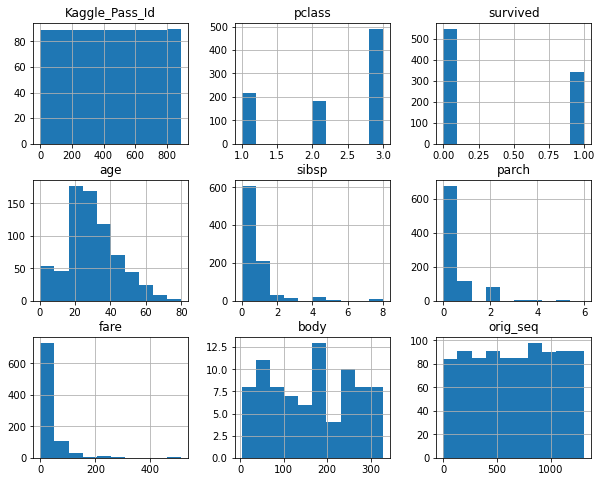

In [11]:
#Variables histogram
train_data.hist(figsize=(10,8));

In [12]:
#Survival probability
train_data[['sex','survived']].groupby(['sex']).mean()

,survived
sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='embarked', ylabel='survived'>

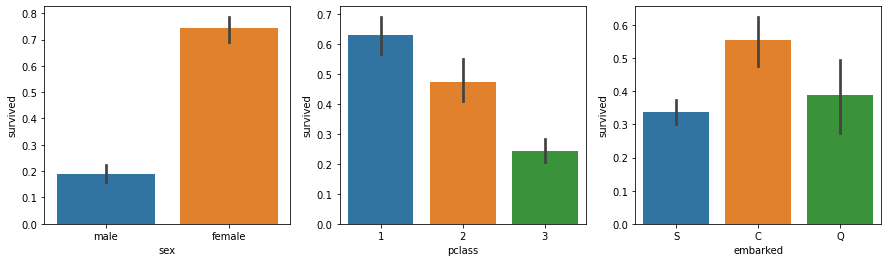

In [13]:
#Plotting barplot Survived x Sex, Pclass and  Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(15,4))
sb.barplot(x='sex', y='survived', data=train_data, ax=axis1)
sb.barplot(x='pclass', y='survived', data=train_data, ax=axis2)
sb.barplot(x='embarked', y='survived', data=train_data, ax=axis3)

C:\Users\dell\anaconda3\envs\I2A2_diego_oliveira\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\envs\I2A2_diego_oliveira\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


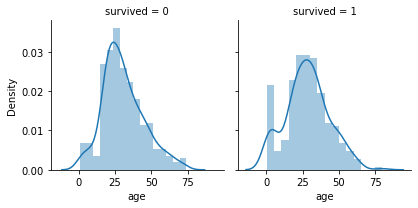

In [14]:
#Influence of age on probability of survival
age_survived = sb.FacetGrid(train_data, col='survived')
age_survived.map(sb.distplot, 'age')

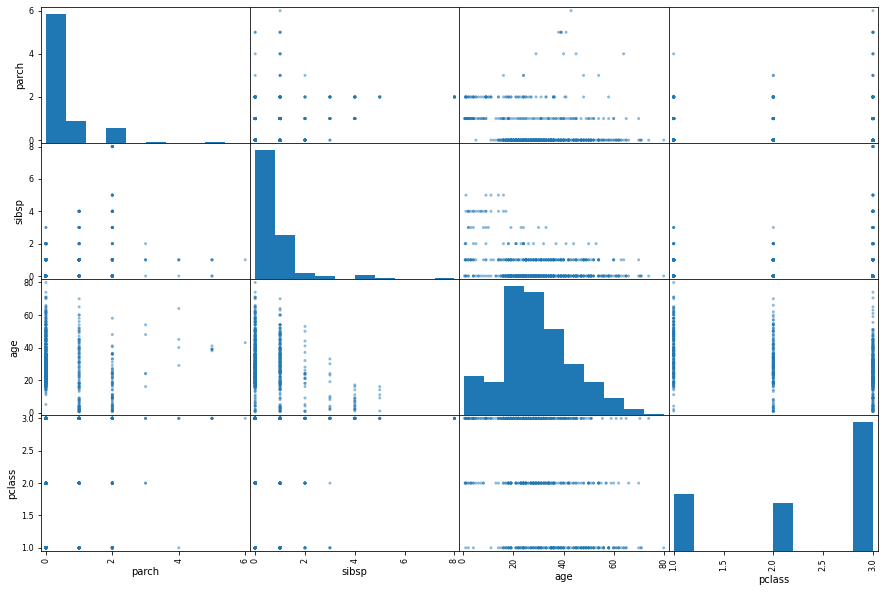

In [15]:
#Plotting a scatter matrix
columns=['parch', 'sibsp', 'age', 'pclass']
pd.plotting.scatter_matrix(train_data[columns], figsize=(15, 10));

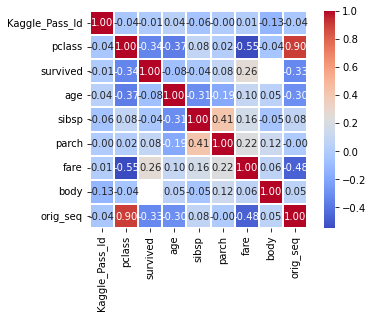

In [16]:
sb.heatmap(train_data.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [17]:
#Descriptive statiscal for non-numerical data
train_data.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,891,891,891,204,889,330,499
unique,891,2,681,147,3,24,291
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,15,"New York, NY"
freq,1,577,7,4,644,27,43


# Data preparing

Joining datasets

In [18]:
train_x = train_data.shape[0]
test_x = test_data.shape[0]

In [19]:
target = train_data['survived']
train_data.drop(['survived'], axis=1, inplace=True)

In [20]:
merged = pd.concat(objs=[train_data,test_data], axis=0).reset_index(drop=True)

In [21]:
print(merged.shape[0])
print(merged.shape[1])

1309
15


In [22]:
train_data

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN,"Worcester, MA",508
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3,NaN,"Greenwich, CT",138
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,902
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",23


In [23]:
test_data

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN,925
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,1291
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN,"Cambridge, MA",512
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,131.0,NaN,1297
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,15,NaN,NaN,868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,NaN,1220
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,8,NaN,NaN,219
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN,1170
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,NaN,1283


In [24]:
merged

,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,NaN,1220
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,8,NaN,NaN,219
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN,1170
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,NaN,1283


In [25]:
print("The shape of the new dataset is: {} variables/columns and {} inputs/lines".format(merged.shape[1],merged.shape[0]))

The shape of the new dataset is: 15 variables/columns and 1309 inputs/lines


Selecting features

In [26]:
#Dropping unnecessary variables
merged.drop(['Kaggle_Pass_Id', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest', 'orig_seq'], axis=1, inplace=True)

Missing data

In [27]:
merged.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [28]:
(merged.isnull().sum()/merged.shape[0]).sort_values(ascending=True)

pclass      0.000000
sex         0.000000
sibsp       0.000000
parch       0.000000
fare        0.000764
embarked    0.001528
age         0.200917
dtype: float64

In [29]:
#age - median
age_median = merged['age'].median()
merged['age'].fillna(age_median, inplace=True)

#fare - median
fare_median = merged['fare'].median()
merged['fare'].fillna(fare_median, inplace=True)

#embarked - mode
embarked_top = merged['embarked'].value_counts()[0]
merged['embarked'].fillna(embarked_top, inplace=True)

In [31]:
#printing age and fare median, and embarked mode
print("{}, {}, {}".format(age_median, fare_median, embarked_top))

28.0, 14.4542, 914


In [32]:
merged.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

Preparing variables for the model

In [33]:
#Converting Sex in 0 and 1
merged['sex'] = merged['sex'].map({'male':0, 'female':1})

In [34]:
#Dummies variables for "Embarked"
embarked_dummies = pd.get_dummies(merged['embarked'], prefix='embarked')
merged = pd.concat([merged, embarked_dummies], axis=1)
merged.drop('embarked', axis=1, inplace=True)

In [35]:
merged

,pclass,sex,age,sibsp,parch,fare,embarked_914,embarked_C,embarked_Q,embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,0,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,0,0
1306,3,0,38.5,0,0,7.2500,0,0,0,1
1307,3,0,28.0,0,0,8.0500,0,0,0,1


Recovering train and test dataset

In [36]:
train = merged.iloc[:train_x]
test = merged.iloc[train_x:]

In [37]:
train

,pclass,sex,age,sibsp,parch,fare,embarked_914,embarked_C,embarked_Q,embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,3,1,28.0,1,2,23.4500,0,0,0,1
889,1,0,26.0,0,0,30.0000,0,1,0,0


In [38]:
test

,pclass,sex,age,sibsp,parch,fare,embarked_914,embarked_C,embarked_Q,embarked_S
891,3,0,34.5,0,0,7.8292,0,0,1,0
892,3,1,47.0,1,0,7.0000,0,0,0,1
893,2,0,62.0,0,0,9.6875,0,0,1,0
894,3,0,27.0,0,0,8.6625,0,0,0,1
895,3,1,22.0,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,0,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,0,0
1306,3,0,38.5,0,0,7.2500,0,0,0,1
1307,3,0,28.0,0,0,8.0500,0,0,0,1


In [39]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

Building the model and evaluating

In [40]:
#Creating a Logistic Regression Model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

#Checking model accuracy
acc_lr_model = round(lr_model.score(train, target) * 100, 2)
print("The Logistic Regression model accuracy is: {}".format(acc_lr_model))

The Logistic Regression model accuracy is: 80.13


In [41]:
##Creating a Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

#Checking model accuracy
acc_tree_model = round(tree_model.score(train, target) * 100, 2)
print("The Decision Tree model accuracy is: {}".format(acc_tree_model))

The Decision Tree model accuracy is: 82.72


In [43]:
#Comparative between Logistic Regression model accuracy and Decision Tree model accuracy
models = [[acc_lr_model,acc_tree_model]]
new = pd.DataFrame(models, columns=['Logistic Regression Model','Tree Decision Model'])
new.rename(columns={'Logistic Regression Model':'Logistic Regression Model','Tree Decision Model':'Tree Decision Model'}, inplace=True)
new.index = ['Accuracy']
new

,Logistic Regression Model,Tree Decision Model
Accuracy,80.13,82.72


Cross Validation

In [44]:
#Models cross validation
scores_lr_model = cross_val_score(lr_model,train.values,target,cv=5)
scores_tree_model = cross_val_score(tree_model,train.values,target,cv=5)
cross_lr = np.mean(scores_lr_model)
cross_tree = np.mean(scores_tree_model)
print(cross_lr)
print(cross_tree)

0.7878852551628899
0.8091959073504487


In [45]:
#Comparative between Logistic Regression cross validation and Decision Tree cross validation
cross_compare = [[cross_lr,cross_tree]]
df_cross_compare = pd.DataFrame(cross_compare,columns=["1","2"])
df_cross_compare.rename(columns={"1":"Logistic Regression","2":"Decision Tree"}, inplace=True)
df_cross_compare.index = ["Cross Validation"]
df_cross_compare

,Logistic Regression,Decision Tree
Cross Validation,0.787885,0.809196


Testing model

In [46]:
#Declaring variables values for different people
person_1 = np.array([3, 0, 29, 3, 3, 22.25, 0, 0, 1, 0]).reshape((1, -1))
person_2 = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

if tree_model.predict(person_1) == 0:
    result_person_1 = "Died"
else:
    result_person_1 = "Survived"
if tree_model.predict(person_2) == 0:
    result_person_2 = "Died"
else:
    result_person_2 = "Survived"
    
#Checking out
print("Person_1 will be:\t{}".format(result_person_1))
print("Person_2 will be:\t{}".format(result_person_2))

Person_1 will be:	Died
Person_2 will be:	Survived


C:\Users\dell\anaconda3\envs\I2A2_diego_oliveira\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\envs\I2A2_diego_oliveira\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
